In [4]:
from DataFetcher import DataFetcher
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
auctions = DataFetcher()
auctions.fetch_auction_data()

https://api.fiscaldata.treasury.gov/services/api/fiscal_service/v1/accounting/od/auctions_query?fields=cusip%2Cauction_date%2Cissue_date%2Csecurity_term%2Cavg_med_yield%2Ccurrently_outstanding%2Coriginal_security_term&sort=auction_date&format=json&page%5Bnumber%5D=106&page%5Bsize%5D=100


,cusip,auction_date,issue_date,security_term,avg_med_yield,currently_outstanding,original_security_term
0,912827KC5,1979-10-31,1979-11-15,10-Year,10.750000,null,10-Year
1,912810CK2,1979-11-01,1979-11-15,30-Year,10.440000,null,30-Year
2,9127933Y0,1979-12-28,1980-01-03,13-Week,null,null,null
3,9127934U7,1979-12-28,1980-01-03,26-Week,null,null,26-Week
4,9127935W2,1980-01-02,1980-01-08,52-Week,null,null,52-Week
...,...,...,...,...,...,...,...
65,912810UL0,2025-06-16,2025-06-30,19-Year 11-Month,null,18189000000.000000,20-Year
66,912797QZ3,2025-06-16,2025-06-20,26-Week,null,null,26-Week
67,912797PX9,2025-06-16,2025-06-20,13-Week,null,68187000000.000000,26-Week
68,91282CNB3,2025-06-17,2025-06-30,4-Year 10-Month,null,26711000000.000000,5-Year


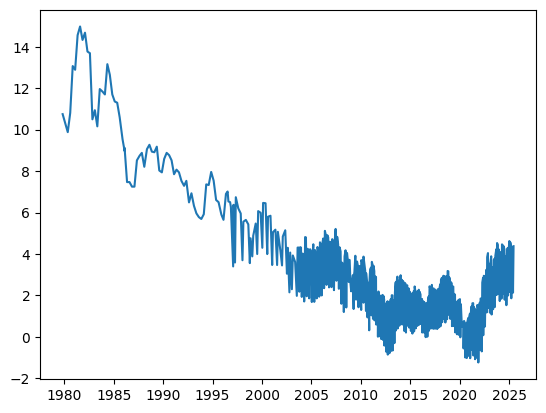

In [5]:
data = auctions.auction_data
yields_over_time = data[data['original_security_term'] == '10-Year'][['auction_date', 'avg_med_yield']]
yields_over_time['auction_date'] = pd.to_datetime(yields_over_time['auction_date'])
yields_over_time['avg_med_yield'] = pd.to_numeric(yields_over_time['avg_med_yield'], errors='coerce')

plt.plot(yields_over_time['auction_date'], yields_over_time['avg_med_yield'], linestyle='-')
plt.show()